$$ u_{st}={H_s^2\omega k \over 16} {cosh[2k(z+h)] \over sinh^2(kh)}\hat k $$

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_pickle('NBDC.pkl')

In [3]:
t = df['dominant_wpd']
k = 2*np.pi / t
# Plot cosh[2k(z+h)] for 46042 (offshore mooring)
h = 2098 #Bottom depth
z = np.arange(0,-1*h,-1,dtype=np.float) #
print z
np.cosh(k[0]*(z+h))
cosh = []
collectDepth = []
for depth in z:
    f1 = np.cosh( k[0] * (depth + h))
    f2 = np.sinh(k[0] * h) ** 2
    val = f1/f2
    if not np.isinf(val):
        cosh.append(val)
        collectDepth.append(depth)

[  0.00000000e+00  -1.00000000e+00  -2.00000000e+00 ...,  -2.09500000e+03
  -2.09600000e+03  -2.09700000e+03]


In [4]:
with plt.style.context(('ggplot')):
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(cosh,collectDepth, 'o')
    ax1.set_xscale('log')

ValueError: Data has no positive values, and therefore can not be log-scaled.

Error in callback <function post_execute at 0x109c5a6e0> (for post_execute):


ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

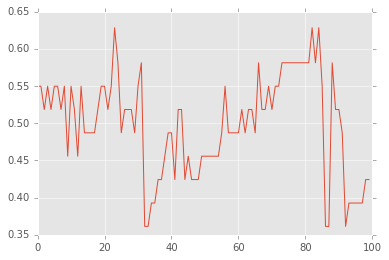

In [38]:
with plt.style.context(('ggplot')):
    fig, ax0 = plt.subplots(1,1)
    ax0.plot(z[:100],k[:100])


In [55]:

def wavedisp(wavper,h):
    """ (omega,k,Cph,Cg) = wavedisp(wavper,h)
    ------------------
    Returns [omega,k,Cph,Cg]

    Inputs (can use arrays):
        wavper - wave period
        h - bottom depth
    Outputs:
    omega - wave frequency
        k - wave number
        Cph - phase speed
        Cg - group velocity 

    T Connolly 2014
    based on Matlab function wavedisp.m from S Lentz """
    wavper=np.array([wavper],dtype=float)
    h=np.array([h])
    omega = 2*np.pi/wavper # Wave frequency
    g = 9.81 # acceleration due to gravity
    c = omega**2*h/g #Phase speed
    x = np.sqrt(c)

#     d = 100*np.ones(np.shape(wavper)) # Initialize array of 100s?
#     tol = 5e-16 # Tolerance ? 
#     while any([d>tol]): # any returns a boolean if 
    f1=x*np.tanh(x)-c
    f2=x*(1/np.cosh(x))**2+np.tanh(x)
    x=x-f1/f2
    d=np.abs((c-x*np.tanh(x))/c)
    k=x/h
    Cph=omega/k
    Cg=(g*k*(1/np.cosh(x))**2+g*np.tanh(x))/(2*np.sqrt(g*k*np.tanh(x)))
        
    return (omega,t,Cph,Cg)

omega,k,Cph,Cg = wavedisp(t,h)


In [47]:
h = 2098
t = np.array(df['dominant_wpd'].values)
len(t)


8748

In [40]:
omega,k,Cph,Cg = wavedisp(t,h)

NameError: global name 'numpy' is not defined